# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import scipy
import matplotlib
import matplotlib.pyplot as plt

# 02. Importing Data

In [2]:
# set path

path = r'C:\Users\Marce\careerfoundry\food'

In [3]:
# Import dataframes

df1 = pd.read_pickle(os.path.join(path,"02 Data", "Prepared Data", "cleaned.pkl"))
df2 = pd.read_csv(os.path.join(path,"02 Data", "Original Data", "better life index.csv"))


In [4]:
# merge data

df_clean = df1.merge(df2, on = ['adm0_name'], how = 'left', indicator= True)

In [5]:
df_clean["_merge"].value_counts()

left_only     2045339
both             5299
right_only          0
Name: _merge, dtype: int64

In [6]:
df_clean.head(10)

,adm0_name,adm1_name,mkt_name,cm_name,cur_name,pt_name,um_name,mp_month,mp_year,mp_price,personal earnings,Household net wealth,_merge
0,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,1,2014,50.0,NaN,NaN,left_only
1,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,2,2014,50.0,NaN,NaN,left_only
2,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,3,2014,50.0,NaN,NaN,left_only
3,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,4,2014,50.0,NaN,NaN,left_only
4,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,5,2014,50.0,NaN,NaN,left_only
5,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,6,2014,50.0,NaN,NaN,left_only
6,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,7,2014,50.0,NaN,NaN,left_only
7,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,8,2014,50.0,NaN,NaN,left_only
8,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,9,2014,50.0,NaN,NaN,left_only
9,Afghanistan,Badakhshan,Fayzabad,Bread - Retail,AFN,Retail,KG,10,2014,50.0,NaN,NaN,left_only


What are the top 5 commodities?
Which markets are used the most?
What category of products is bought most?
How does price change over time?
How does price change for certain goods?
Which currency is used the most?
Do most loved products change over time? If yes, which?
Highest price product?

variables for these questions are "mp_price", "pt_name", "mkt_name", "mp_year", "mp_month", "cur_name"

In [7]:
sub = df_clean[["mp_year","Household net wealth","mp_price","personal earnings"]]

In [8]:
sub

,mp_year,Household net wealth,mp_price,personal earnings
0,2014,NaN,50.0000,NaN
1,2014,NaN,50.0000,NaN
2,2014,NaN,50.0000,NaN
3,2014,NaN,50.0000,NaN
4,2014,NaN,50.0000,NaN
...,...,...,...,...
2050633,2021,NaN,233.3333,NaN
2050634,2021,NaN,112.5000,NaN
2050635,2021,NaN,114.0000,NaN
2050636,2021,NaN,59.5000,NaN


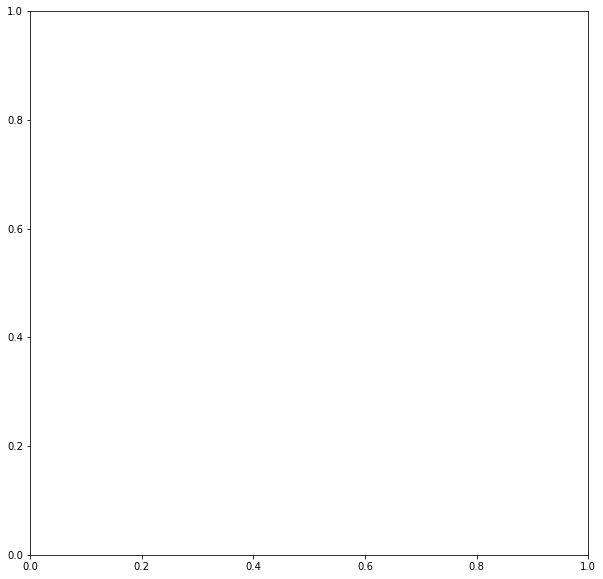

In [9]:
# Create a subplot with matplotlib

f,ax = plt.subplots(figsize=(10,10))

In [10]:
# create correlation heatmap in seaborn, apply a heatmap onto subplot

corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

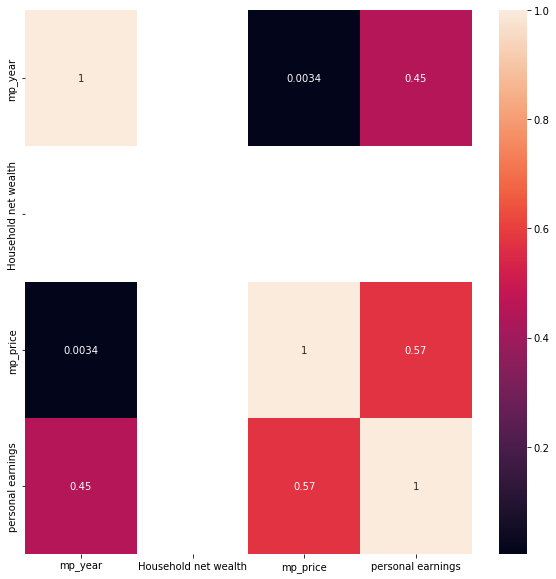

In [11]:
corr.figure

#### The above heatmap shows there is a positive correlation between "mp_price" and "personal earnings"

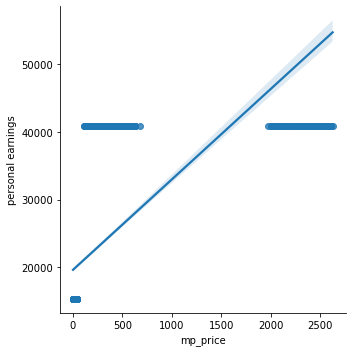

In [12]:
sns.lmplot(x = "mp_price",y = "personal earnings", data = df_clean)

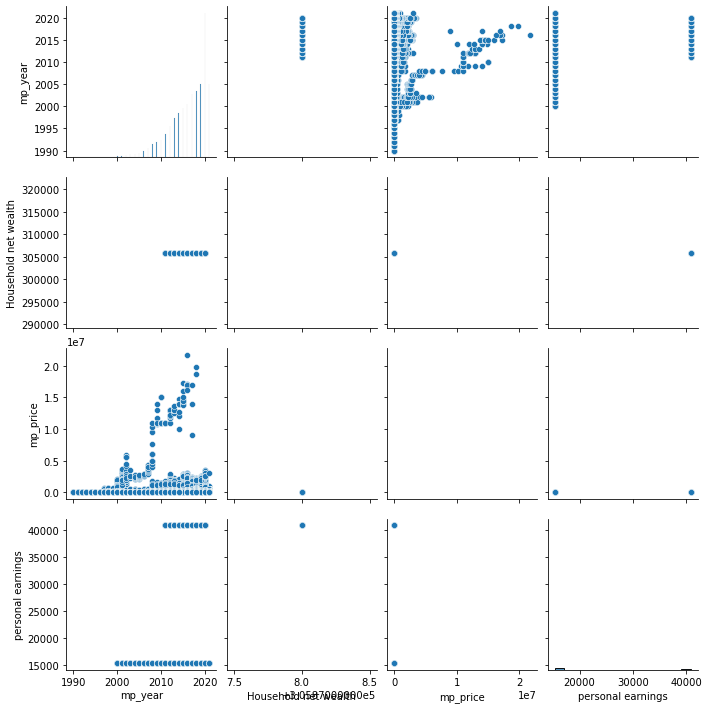

In [13]:
g = sns.pairplot(sub)

<AxesSubplot:xlabel='mp_year', ylabel='Count'>

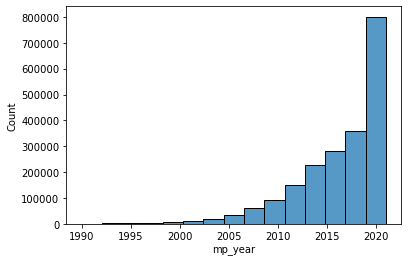

In [14]:
sns.histplot(df_clean['mp_year'], bins = 15)

In [15]:
df_clean.loc[df_clean['mp_price'] < 2000, 'Price category'] = 'Low price'

In [16]:
df_clean.loc[df_clean['mp_price'] >= 2000, 'Price category'] = 'High price'

In [17]:
df_clean['Price category'].value_counts(dropna = False)

Low price     1642901
High price     407737
Name: Price category, dtype: int64

In [18]:
df_clean.columns

Index(['adm0_name', 'adm1_name', 'mkt_name', 'cm_name', 'cur_name', 'pt_name',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'personal earnings',
       'Household net wealth', '_merge', 'Price category'],
      dtype='object')

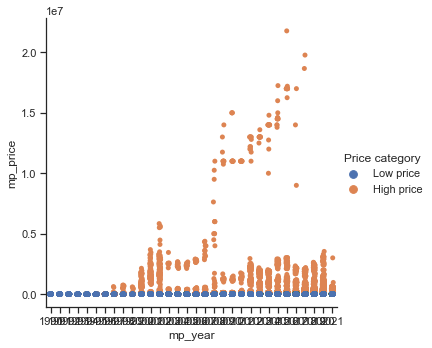

In [19]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="mp_year", y="mp_price", hue="Price category", data=df_clean)
plt.savefig('catplot.png')

In [20]:
#df_clean.to_pickle(os.path.join(path, "02 Data","Prepared Data", "merged.pkl"))

### From my questions I can't answer any with the visualizations.

# H0 = Increasing years don't have an effect on prices.
# H1 = Increasing years have a positive effect on prices.